# Water and energy use correlation notebook:

### Here we will explore whether there is a relationship between water use and electricity use in our home network.

We've already exported the electricty and water data to a file in our JupyterHub's shared filesystem which is mounted in your home directory at `~/shared/`, our methodology for extracting the data is as follows:

To find correlation between home's energy use and water use, Blucube water data from dataport (water_and_gas.blucube_water_data) and 1-minute interval energy (electricity.eg_realpower_1min) data was used. Blucube data consists of the cumulative device reading (in gallons), so the water usage has been calculated for each interval by subtracting current interval reading from previous interval. After calculating delta usage, only those time intervals with a delta greater than 0 were included in the dataset. This data has then been joined with energy data to find how much electricity was used in those same time intervals when water was used in a home.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import sys
import statistics
%matplotlib inline
print(sys.version) # prints the python version
print(sys.executable)  # prints the path to the python you're using

3.8.5 | packaged by conda-forge | (default, Aug 21 2020, 18:21:27) 
[GCC 7.5.0]
/opt/conda/bin/python


In [2]:
# Read processed Data. Blucube water data from dataport has been processed to calculate delta 
# water usage for each minute interval. Only those intervals have been considered where water usage > 0.
data = pd.read_csv('/shared/elec_water_data.csv')
homes_list = data.dataid.unique() 
homes_list

array([9982, 4473, 6910, 2361, 2204,  483, 6836,  114, 2461, 9956, 7719,
       8243, 4894, 7541, 1517, 6990, 7680, 7690, 2233, 3456, 7739, 5921,
       8386, 3009, 5246,  668, 2129, 8084, 6578, 1185, 7937, 8156,  744,
       7627, 2335, 1800, 5615,  946, 3506, 5450, 7741, 8995, 3310, 3967])

9982 -> 0.049


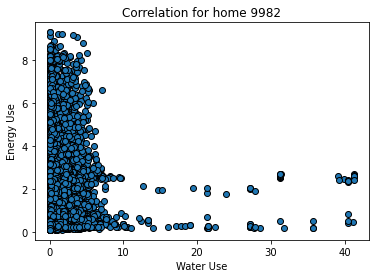

4473 -> 0.064


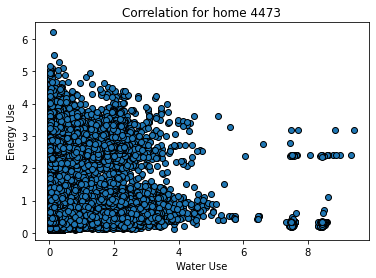

6910 -> -0.028


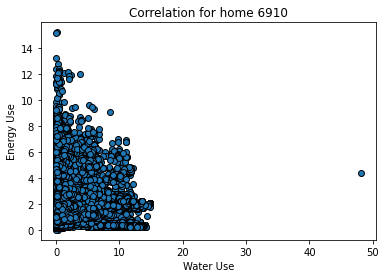

2361 -> -0.127


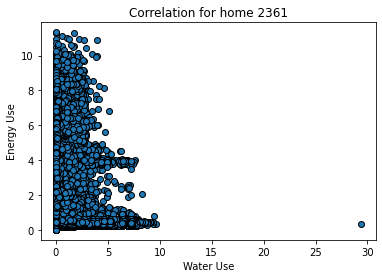

2204 -> 0.245


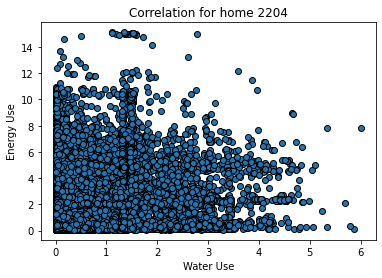

483 -> -0.072


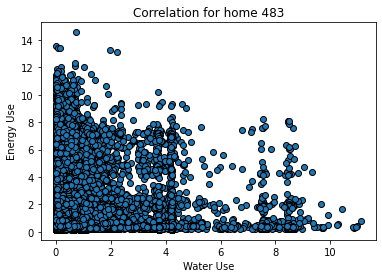

6836 -> -0.041


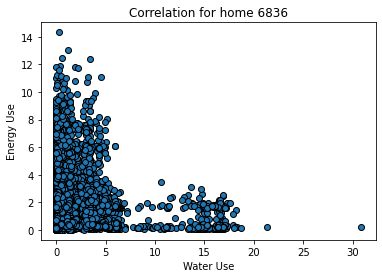

114 -> 0.012


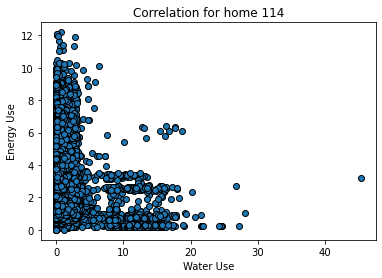

2461 -> -0.014


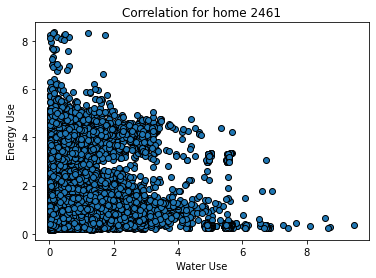

9956 -> -0.043


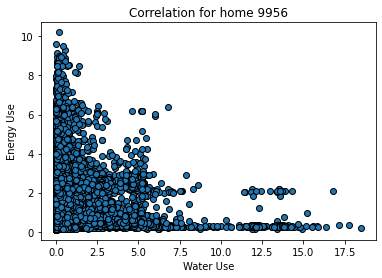

7719 -> -0.044


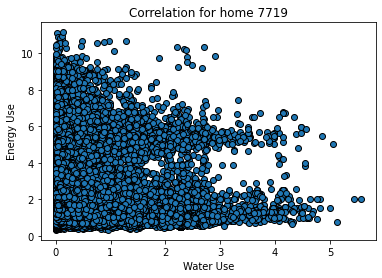

8243 -> 0.052


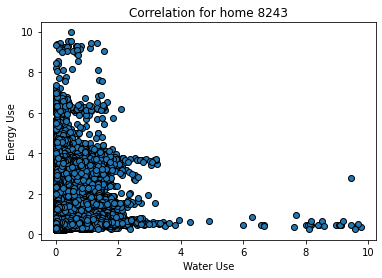

4894 -> 0.143


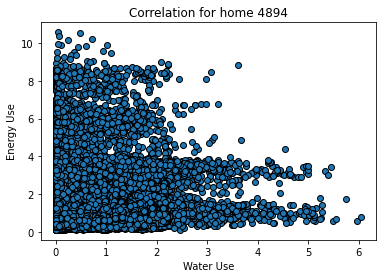

7541 -> -0.029


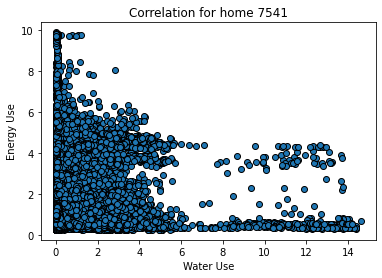

1517 -> 0.023


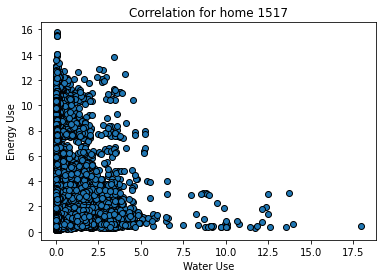

6990 -> 0.07


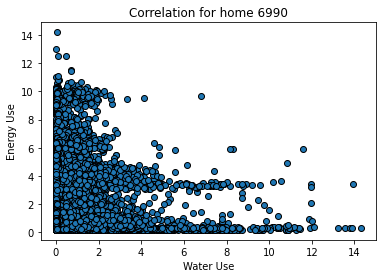

7680 -> -0.023


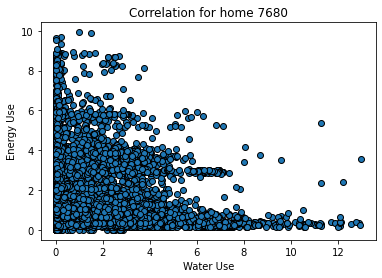

7690 -> 0.004


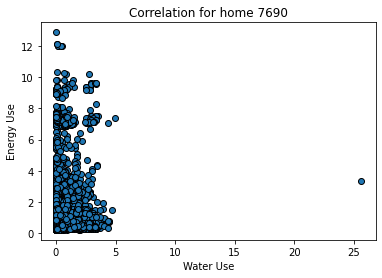

2233 -> 0.093


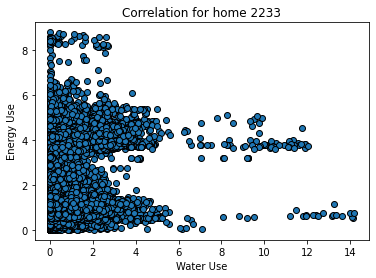

3456 -> -0.122


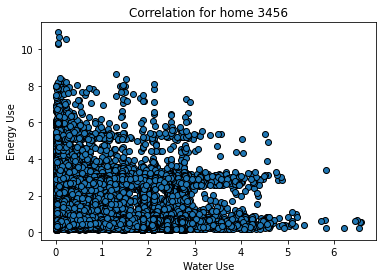

7739 -> 0.204


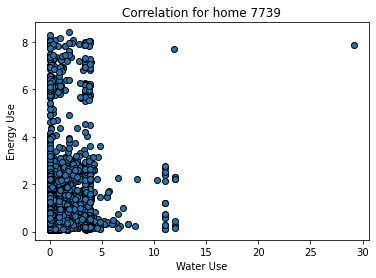

5921 -> -0.089


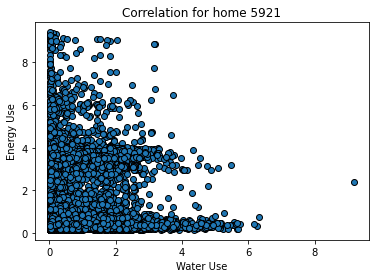

8386 -> -0.013


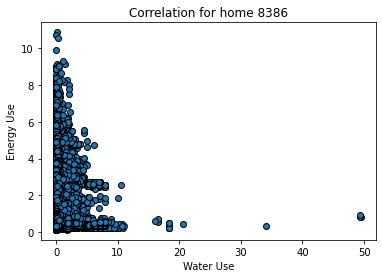

3009 -> -0.028


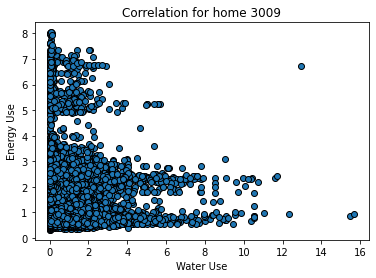

5246 -> -0.02


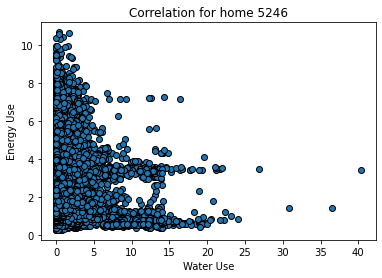

668 -> 0.164


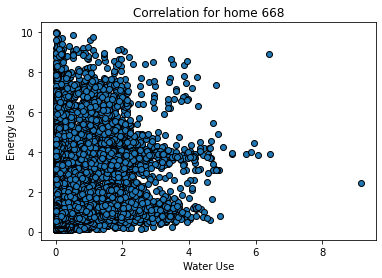

2129 -> 0.03


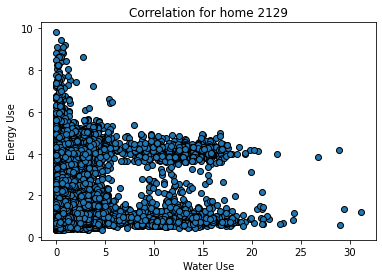

8084 -> -0.035


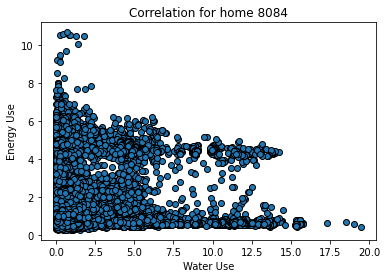

6578 -> 0.145


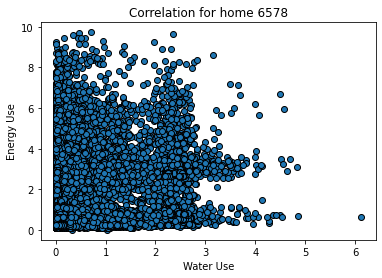

1185 -> 0.232


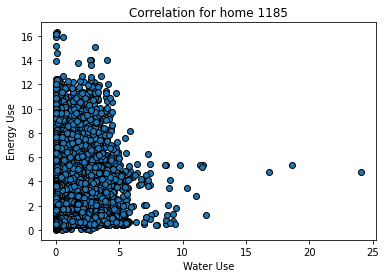

7937 -> 0.006


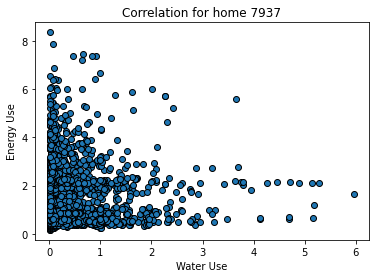

8156 -> 0.051


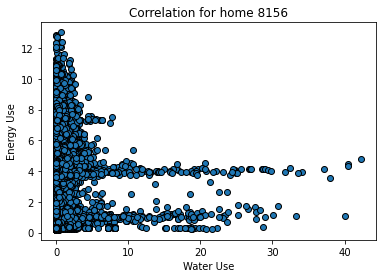

744 -> 0.052


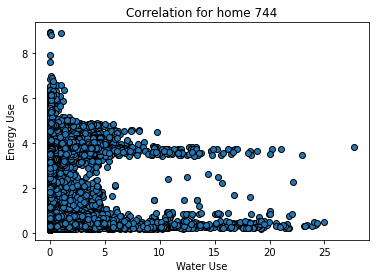

7627 -> 0.032


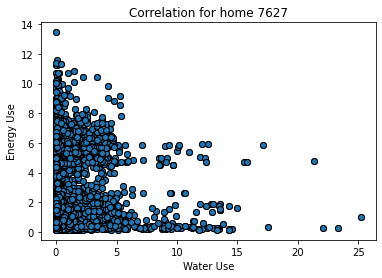

2335 -> 0.009


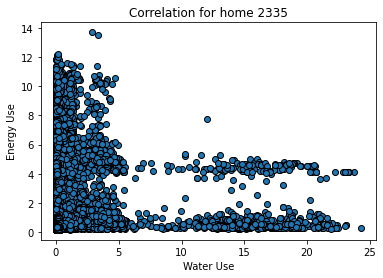

1800 -> 0.055


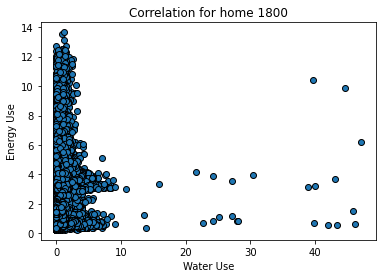

5615 -> 0.071


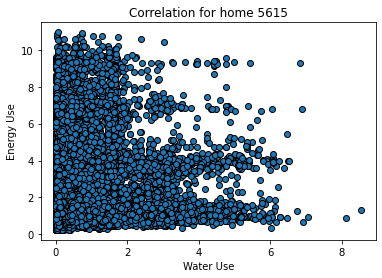

946 -> 0.037


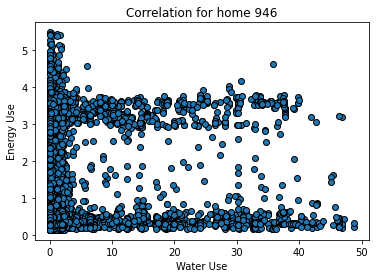

3506 -> -0.12


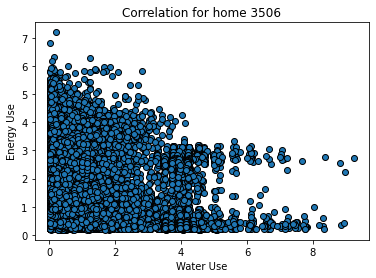

5450 -> 0.049


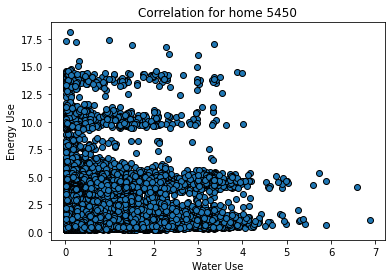

7741 -> 0.075


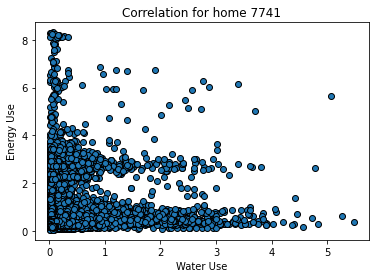

8995 -> 0.138


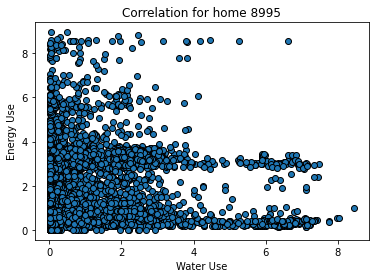

3310 -> -0.098


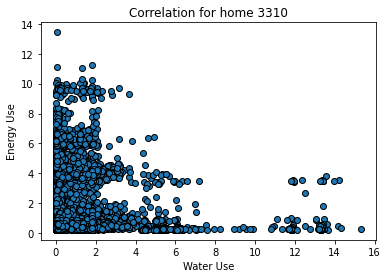

3967 -> 0.03


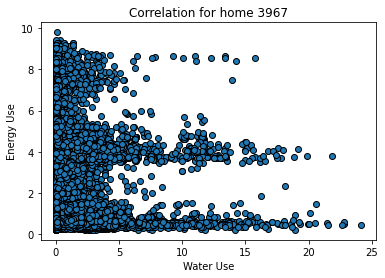

In [3]:
# Loop through list of homes and find correlation between water and electricity usage and also plot the datapoints
homes_cor = []
for home in homes_list:
    data_to_process = data.loc[(data['dataid'] == home)]
    x = data_to_process["water_use"]
    y = data_to_process["elec_use"]
    correlation = round(x.corr(y),3)
    homes_cor.append(correlation)
    print(str(home) + ' -> ' + str(correlation))
    plt.scatter(x, y, edgecolors='black')
    plt.title('Correlation for home {}'.format(home))
    plt.xlabel('Water Use')
    plt.ylabel('Energy Use')
    plt.show()

In [4]:
print("Average correlation for all homes: ", statistics.mean(homes_cor))

Average correlation for all homes:  0.02702272727272727


## Conclusion:
### From above plots and calculated average correlation we can say that water and electricity usage is *not* positively correlated.